## AirBnB Listing Analysis
Analyze AirBnB listings in Paris to determine the impact of recent regulations

#### Airbnb Listings & Reviews
Airbnb data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

NOTE: Prices are in local currency

#### Recommended Analysis

 - Can you spot any major differences in the Airbnb market between cities?

 - Which attributes have the biggest influence in price?

 - Are you able to identify any trends or seasonality in the review data?

 - Which city offers a better value for travel?

In [161]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [162]:
# AirBnB listing Data
airbnb = pd.read_csv('E:\Maven_Analytics_Challenges\Projects\AirBnB_Listing_Analysis\Dataset\Listings.csv', 
                     encoding = 'latin1', low_memory=False)

In [163]:
# dimensions of data
airbnb.shape

(279712, 33)

In [164]:
airbnb.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [165]:
# datatypes
airbnb.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [166]:
# convert to datetime
airbnb['host_since'] = pd.to_datetime(airbnb['host_since'])

In [167]:
# take into consideration only specified columns
paris_listing = airbnb[airbnb['city']=='Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [168]:
# check new dataframe
paris_listing.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [169]:
# dimensions
paris_listing.shape

(64690, 5)

In [170]:
# descriptive statistics
paris_listing.describe(include='all').T

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5360\3918826319.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  paris_listing.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
host_since,64657,3854,2019-09-02 00:00:00,634,2008-08-30,2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,64690,20,Buttes-Montmartre,7237,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,64690,1,Paris,64690,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,64690.0,NaN,NaN,NaN,NaT,NaT,3.037997,1.588766,0.0,2.0,2.0,4.0,16.0
price,64690.0,NaN,NaN,NaN,NaT,NaT,113.096445,214.433668,0.0,59.0,80.0,120.0,12000.0


In [171]:
# check for null/missing values
paris_listing.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [172]:
# duplicate records
paris_listing.duplicated().sum()

2113

In [173]:
# drop duplicates
paris_listing.drop_duplicates(inplace=True)

In [174]:
# dimensions of the new dataframe
paris_listing.shape

(62577, 5)

In [175]:
# create a column host_year
paris_listing['host_year'] = paris_listing['host_since'].dt.year.convert_dtypes('int')

#### Objective 2: Task 1: Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

In [176]:
paris_listing_neighbourhood = paris_listing.groupby('neighbourhood').agg({'price':'mean'}).sort_values(
    by='price', ascending=True).reset_index()
paris_listing_neighbourhood['price'] = paris_listing_neighbourhood['price'].round(2)
paris_listing_neighbourhood

,neighbourhood,price
0,Menilmontant,75.45
1,Buttes-Chaumont,80.91
2,Buttes-Montmartre,87.55
3,Reuilly,89.46
4,Popincourt,90.81
5,Gobelins,98.44
6,Observatoire,102.13
7,Batignolles-Monceau,102.66
8,Enclos-St-Laurent,103.07
9,Vaugirard,106.85


#### Objective 2 - Task 2 - Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

In [177]:
paris_listing_accomodations = paris_listing[paris_listing['neighbourhood']=='Elysee'].groupby('accommodates').agg({'price':'mean'}).sort_values(
    by='price', ascending=True).reset_index()
paris_listing_accomodations['price'] = paris_listing_accomodations['price'].round(2)
paris_listing_accomodations

,accommodates,price
0,0,0.00
1,1,80.47
2,3,153.34
3,2,157.24
4,4,213.65
5,5,330.09
6,6,357.68
7,8,395.50
8,7,411.54
9,9,440.27


#### Objective 2: Task 3: Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [178]:
paris_listings_over_time = paris_listing.groupby('host_year').agg({'host_since':'count', 'price':'mean'}).sort_values(
    by='host_year', ascending=True).reset_index()
paris_listings_over_time['price'] = paris_listings_over_time['price'].round(2)
paris_listings_over_time

,host_year,host_since,price
0,2008,4,77.75
1,2009,104,159.97
2,2010,412,125.15
3,2011,1318,125.11
4,2012,4487,111.95
5,2013,7926,106.86
6,2014,10614,100.50
7,2015,11747,104.19
8,2016,8601,112.03
9,2017,4422,108.90


#### Objective 3 - Visualize the data and summarize findings

Your final objective is to build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

#### Task 1: Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

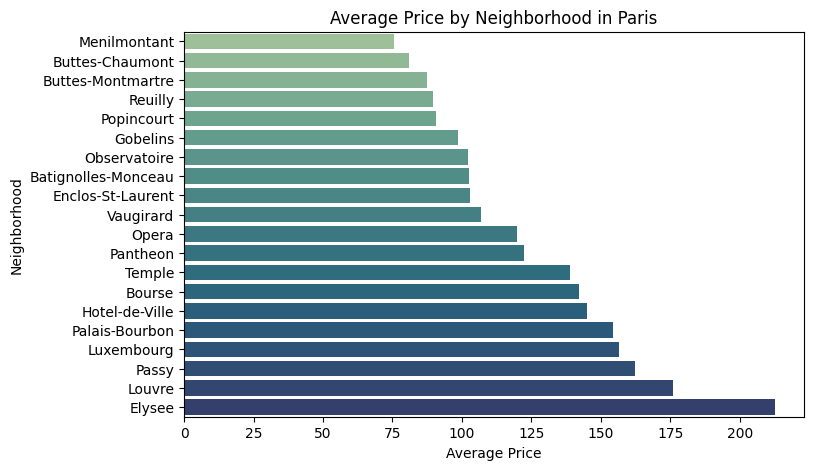

In [179]:
plt.figure(figsize=(8,5))
sns.barplot(data=paris_listing_neighbourhood, x='price', y='neighbourhood', estimator=np.mean, ci=None, dodge=False,
            palette='crest')
plt.title('Average Price by Neighborhood in Paris')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

#### Task 2: Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

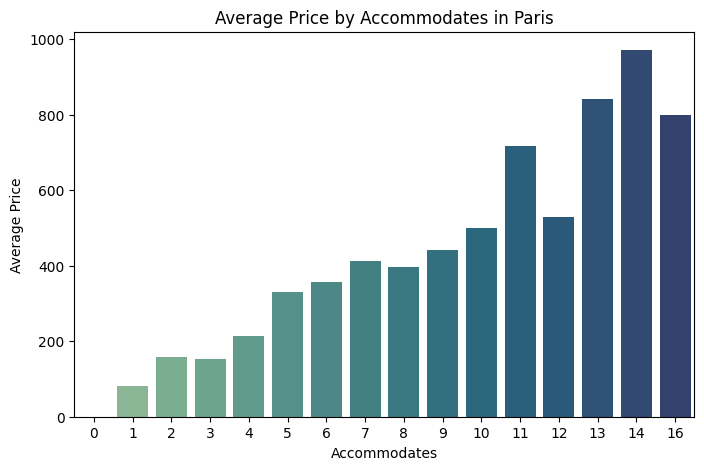

In [180]:
plt.figure(figsize=(8,5))
sns.barplot(data=paris_listing_accomodations, x='accommodates', y='price', estimator=np.mean, ci=None, dodge=False,
            palette='crest')
plt.title('Average Price by Accommodates in Paris')
plt.xlabel('Accommodates')
plt.ylabel('Average Price')
plt.show()

#### Task 3: Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

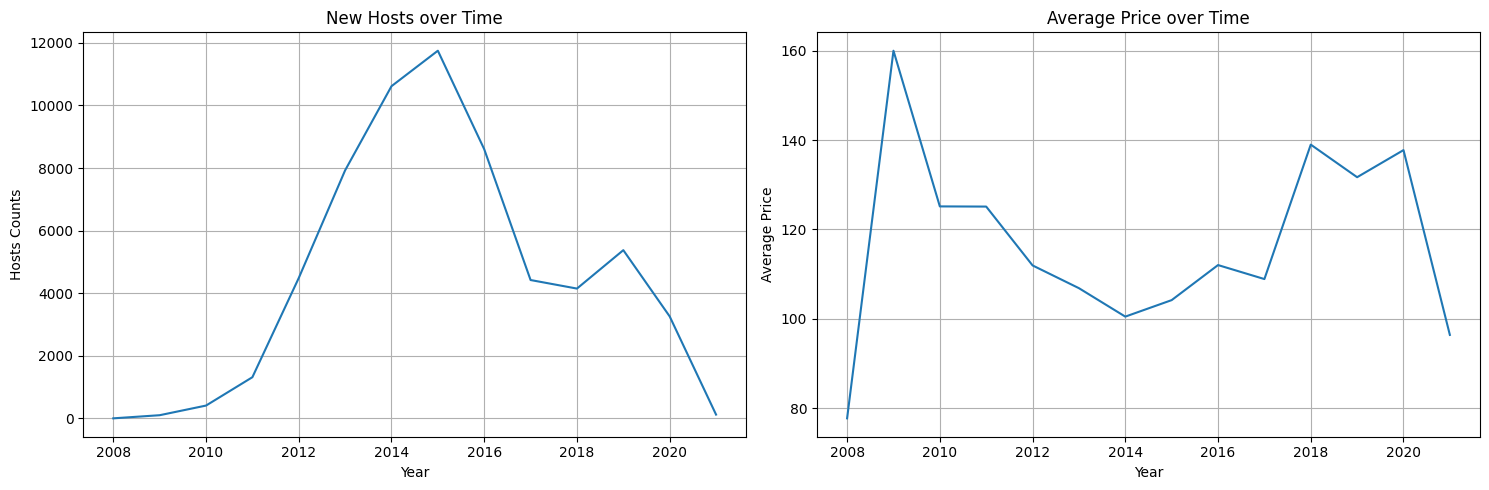

In [181]:
plt.figure(figsize=(15,5))

# New hosts over time
ax1 = plt.subplot2grid((1,2),(0,0))
sns.lineplot(data=paris_listings_over_time, x='host_year', y='host_since', palette='crest', ax=ax1)
plt.title("New Hosts over Time")
plt.xlabel("Year")
plt.ylabel("Hosts Counts")
plt.grid(True)


# Average Price over time
ax2 = plt.subplot2grid((1,2),(0,1))
sns.lineplot(data=paris_listings_over_time, x='host_year', y='price', palette='crest', ax=ax2)
plt.title("Average Price over Time")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Task 5: Create a dual axis line chart to show both new hosts and average price over time

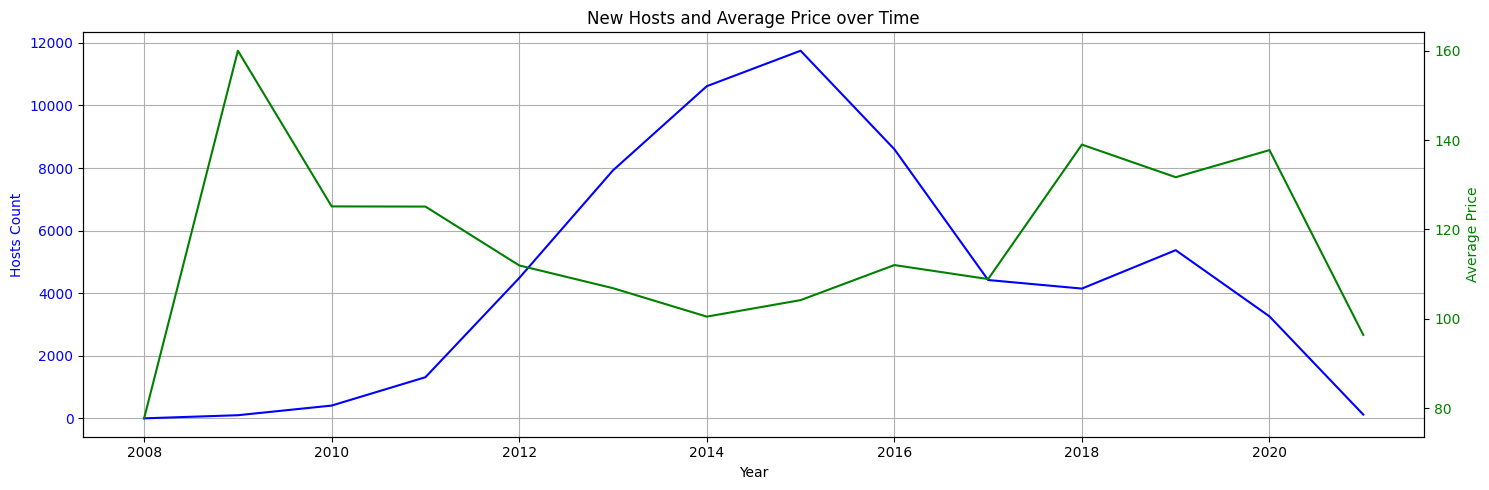

In [182]:
# Create a figure
plt.figure(figsize=(15, 5))

# Create the first axis for "New Hosts over Time"
ax1 = plt.gca()  # Get the current axes (first plot)
sns.lineplot(data=paris_listings_over_time, x='host_year', y='host_since', color='b', ax=ax1)
ax1.set_title("New Hosts and Average Price over Time")
ax1.set_xlabel("Year")
ax1.set_ylabel("Hosts Count", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create the second axis for "Average Price over Time"
ax2 = ax1.twinx()  # Create a twin axis sharing the same x-axis
sns.lineplot(data=paris_listings_over_time, x='host_year', y='price', color='g', ax=ax2)
ax2.set_ylabel("Average Price", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()